In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import time,timedelta,datetime,date
import datetime



# Estudio días clúster 3

In [ ]:
with open('/content/gdrive/MyDrive/PatronesComportamiento/dias_senalados/dic_dates.pkl', 'rb') as file:
        dic_dates=pickle.load(file)
print((dic_dates[2]))

[datetime.datetime(2021, 8, 6, 0, 0), datetime.datetime(2022, 8, 19, 0, 0), datetime.datetime(2022, 7, 22, 0, 0), datetime.datetime(2022, 8, 26, 0, 0), datetime.datetime(2022, 8, 2, 0, 0), datetime.datetime(2022, 8, 5, 0, 0), datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 8, 29, 0, 0), datetime.datetime(2022, 8, 4, 0, 0), datetime.datetime(2021, 8, 3, 0, 0), datetime.datetime(2022, 8, 11, 0, 0), datetime.datetime(2021, 8, 11, 0, 0), datetime.datetime(2022, 8, 24, 0, 0), datetime.datetime(2022, 8, 8, 0, 0), datetime.datetime(2021, 8, 4, 0, 0), datetime.datetime(2022, 8, 17, 0, 0), datetime.datetime(2021, 8, 17, 0, 0), datetime.datetime(2022, 8, 12, 0, 0), datetime.datetime(2021, 8, 27, 0, 0), datetime.datetime(2022, 8, 22, 0, 0), datetime.datetime(2021, 8, 10, 0, 0), datetime.datetime(2021, 8, 12, 0, 0), datetime.datetime(2022, 8, 3, 0, 0), datetime.datetime(2021, 8, 20, 0, 0), datetime.datetime(2021, 8, 13, 0, 0), datetime.datetime(2022, 8, 23, 0, 0), datetime.datetime(

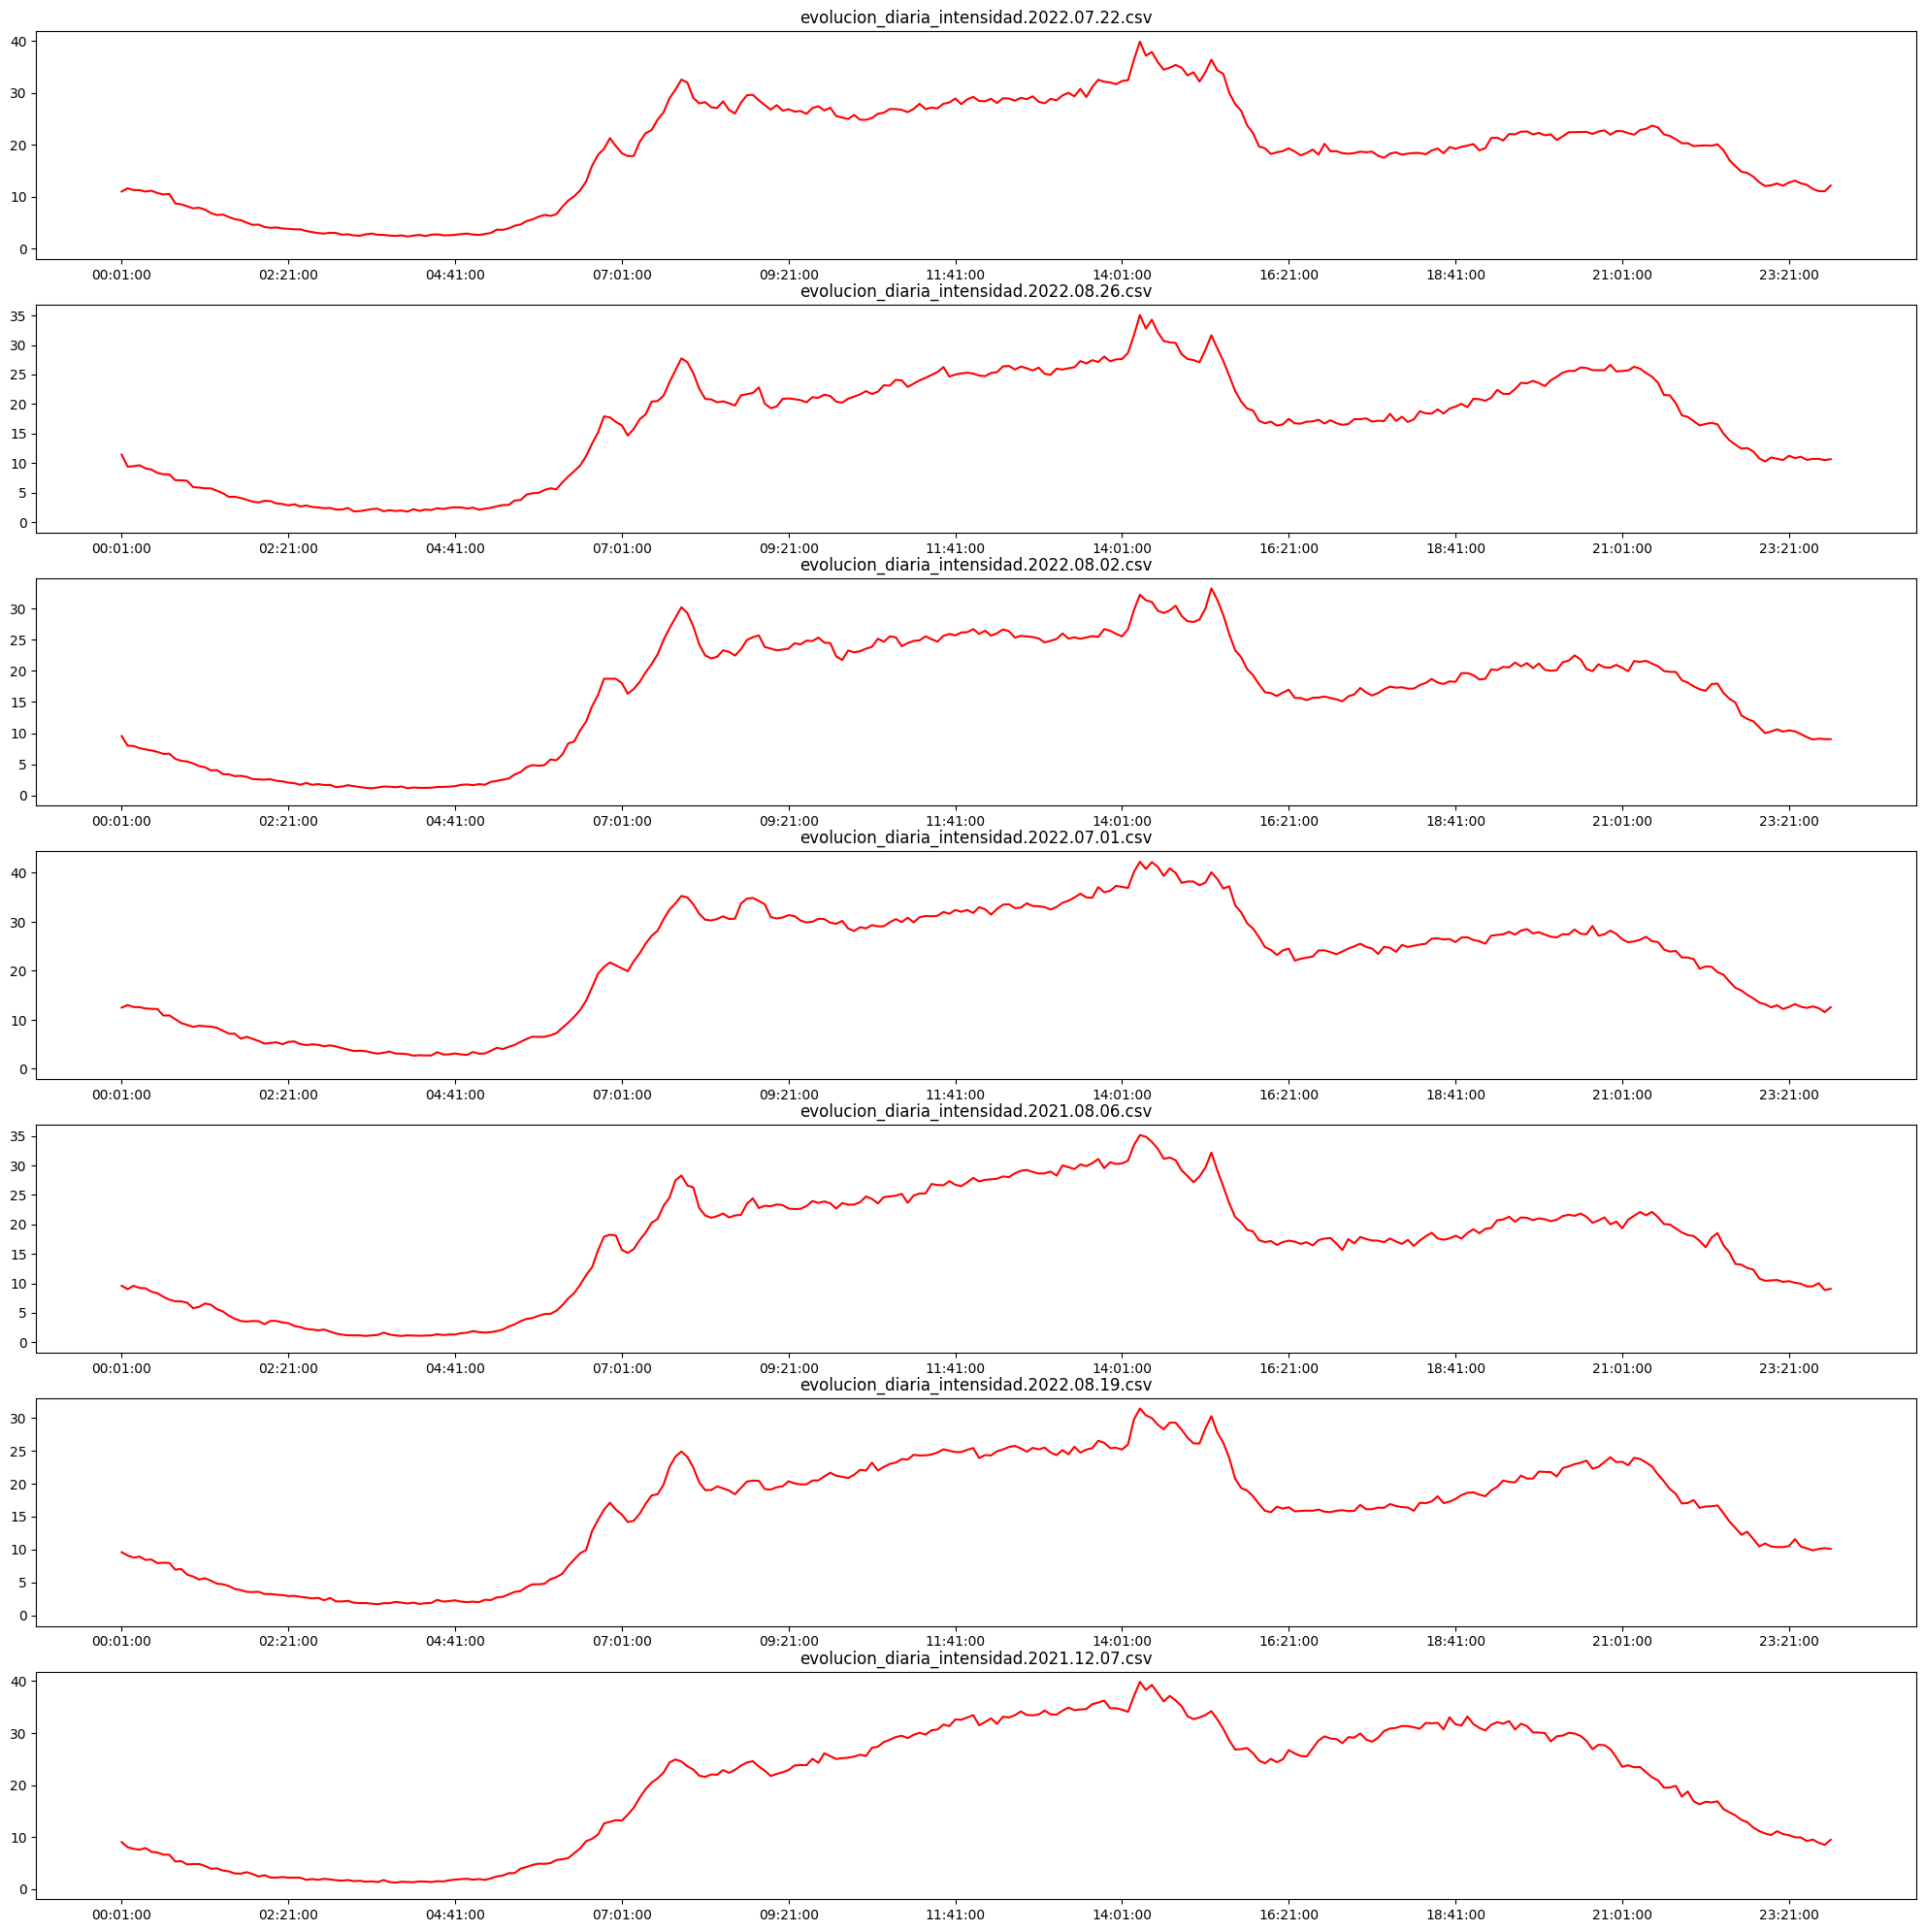

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

fig,axs=plt.subplots(len(dic_dates[2][:7]),1,figsize=(25,25))
i=0
for v in dic_dates[2][:7]:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  axs[i-4].set_title(fileSelected)

  axs[i-4].plot(df, color='r')
  i+=1



no
no
no
no
si
si
si
si


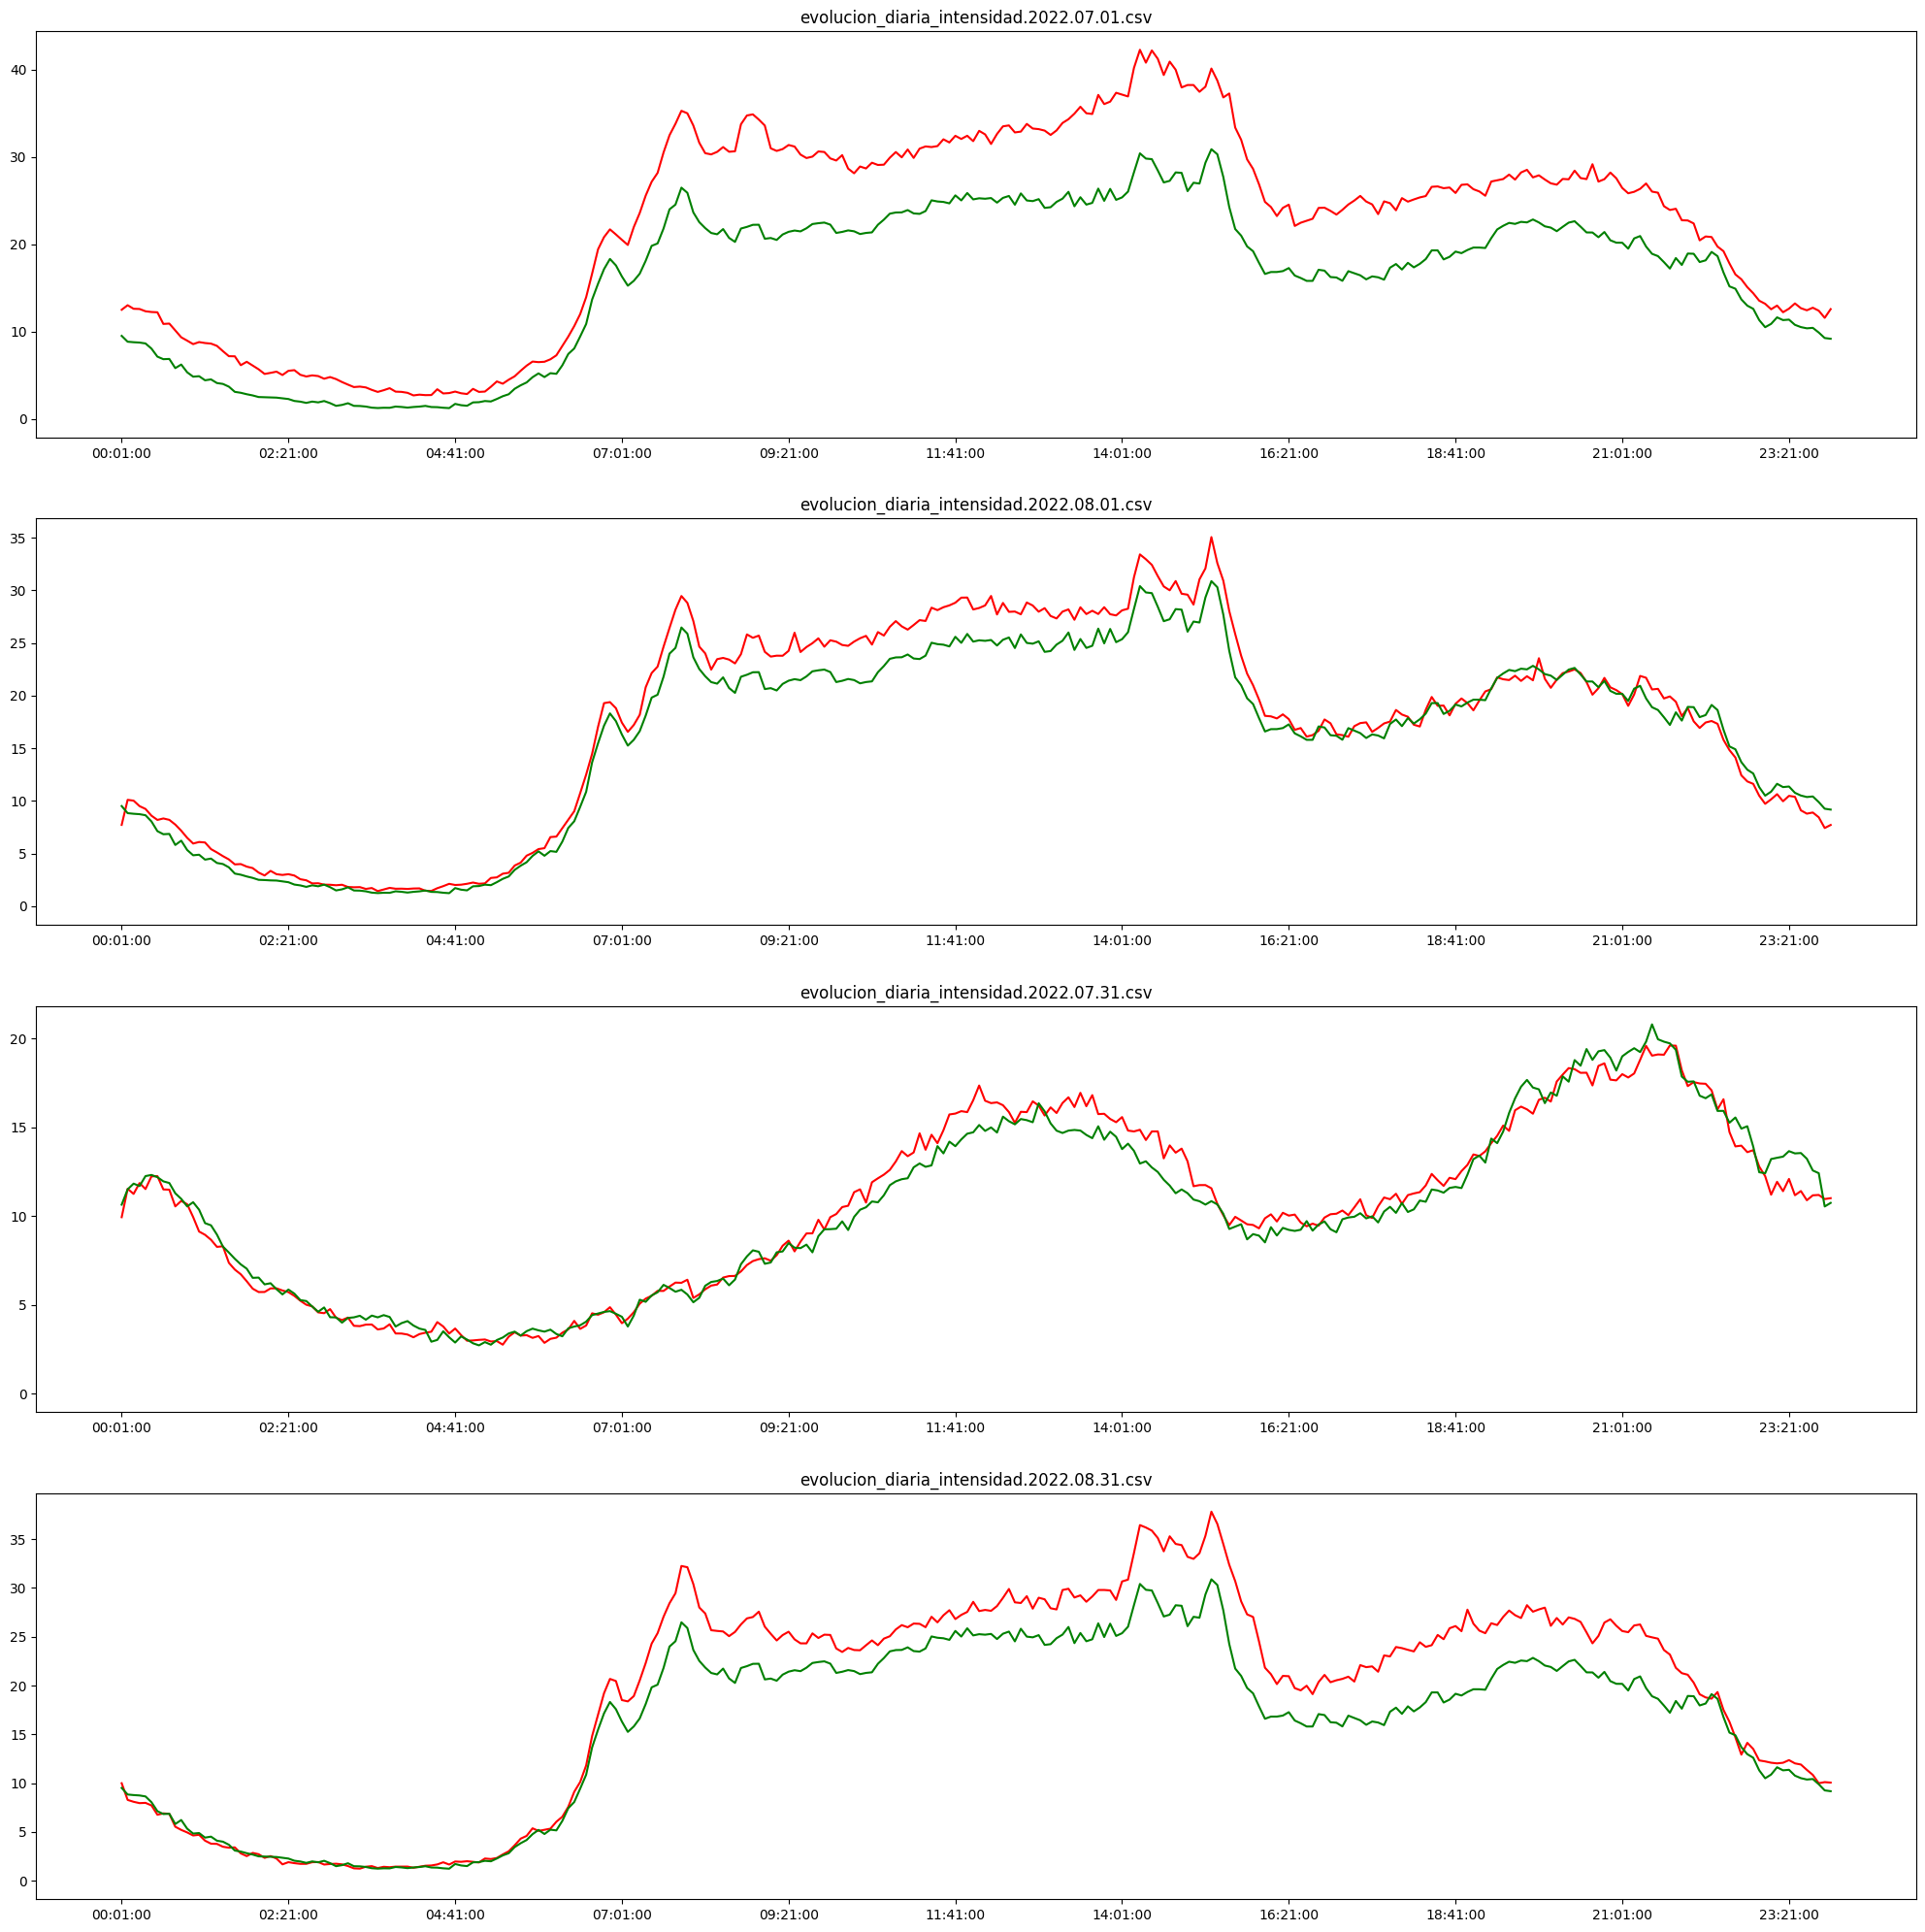

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

vacation_dates=[datetime.datetime(2022,7,1,0,0),datetime.datetime(2022,8,1,0,0),
                datetime.datetime(2022,7,31,0,0),datetime.datetime(2022,8,31,0,0), 
                datetime.datetime(2022,8,10,0,0),datetime.datetime(2022,8,10,0,0),
                 datetime.datetime(2022,7,17,0,0),datetime.datetime(2022,8,10,0,0)]
fig,axs=plt.subplots(int(len(vacation_dates)/2),1,figsize=(25,25))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  oldi=i
  if i>int(len(vacation_dates)/2)-1:
    color='g'
    print("si")
  else:
    color='r'
    print("no")
  
  i=i%int(len(vacation_dates)/2)

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  if color == 'r':
    axs[i-4].set_title(fileSelected)

  axs[i-4].plot(df, color=color)
  i=oldi+1



In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig,axs=plt.subplots(7,1,figsize=(25,25))
for i in 

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(4,10):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2022.06.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2022.06.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  axs[i-4].set_title(fileSelected)

  axs[i-4].plot(df, color='r')




# Concierto Red Hot Chilli Peppers

Este concierto tuvo lugar el 4 de Junio de 2022, vamos a analizar como se comportaba la intensidad y la ocupación antes y después de empezar. Tendremos que analizar el 4 de junio y el día siguiente pues termina en la madrugada del 5.

no
no
si
si


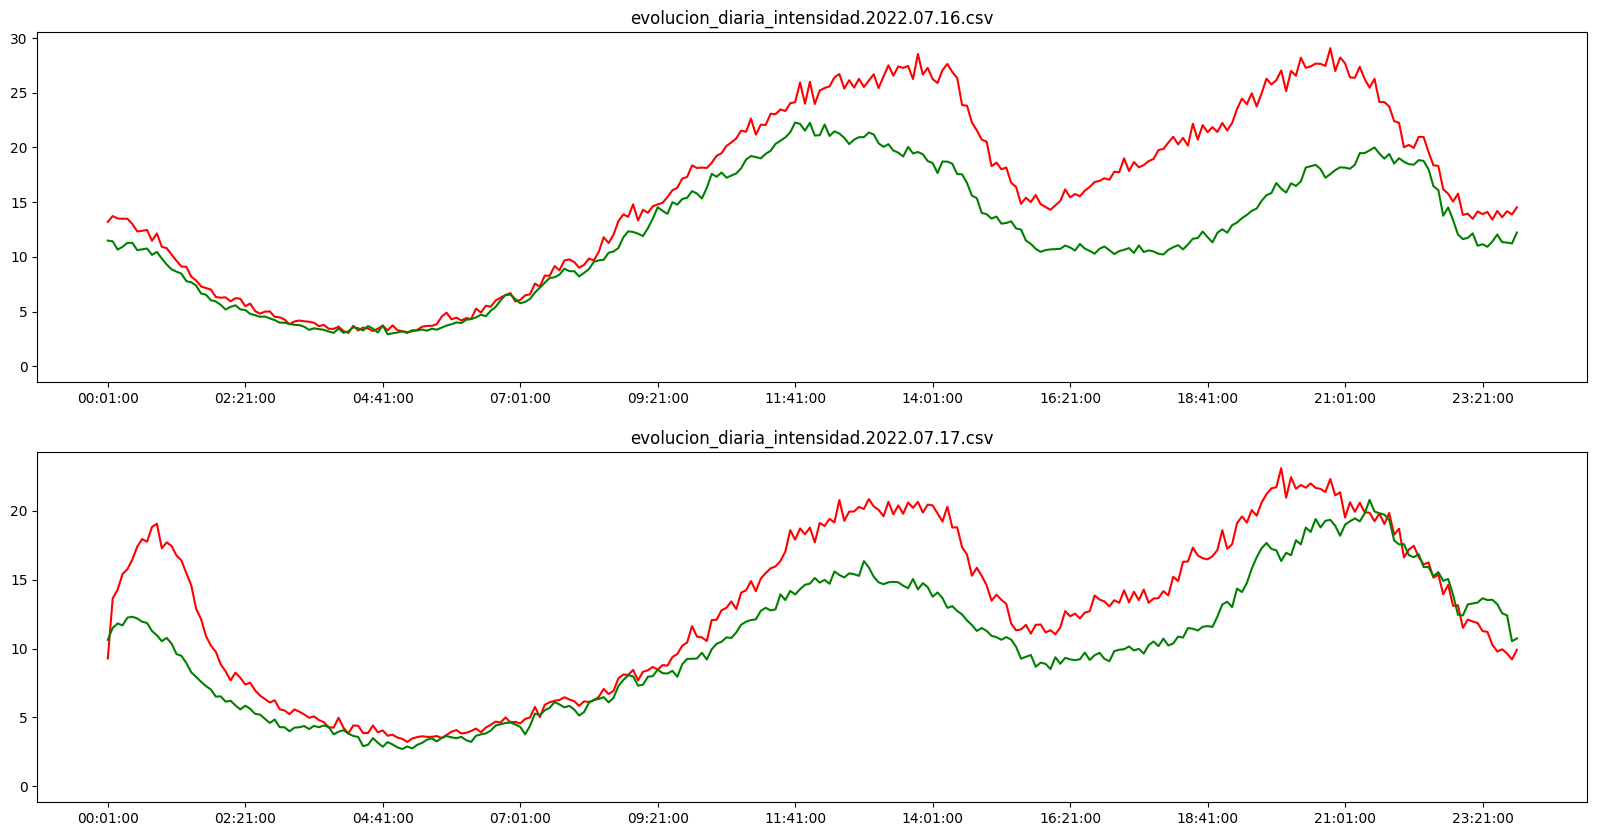

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

vacation_dates=[datetime.datetime(2022,6,4,0,0),datetime.datetime(2022,6,5,0,0),datetime.datetime(2022, 7, 16, 0, 0),datetime.datetime(2022, 7, 17, 0, 0)]
fig,axs=plt.subplots(2,1,figsize=(20,10))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>1:
    color='g'
    print("si")
  else:
    color='r'
    print("no")
  oldi=i
  i=i%2
  axs[i-2].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-2].set_xticks(xticks)
  axs[i-2].set_title(fileSelected)

  axs[i-2].plot(df, color=color)
  i=oldi+1

# Concierto Puro Latino

no
no
no
si
si
si


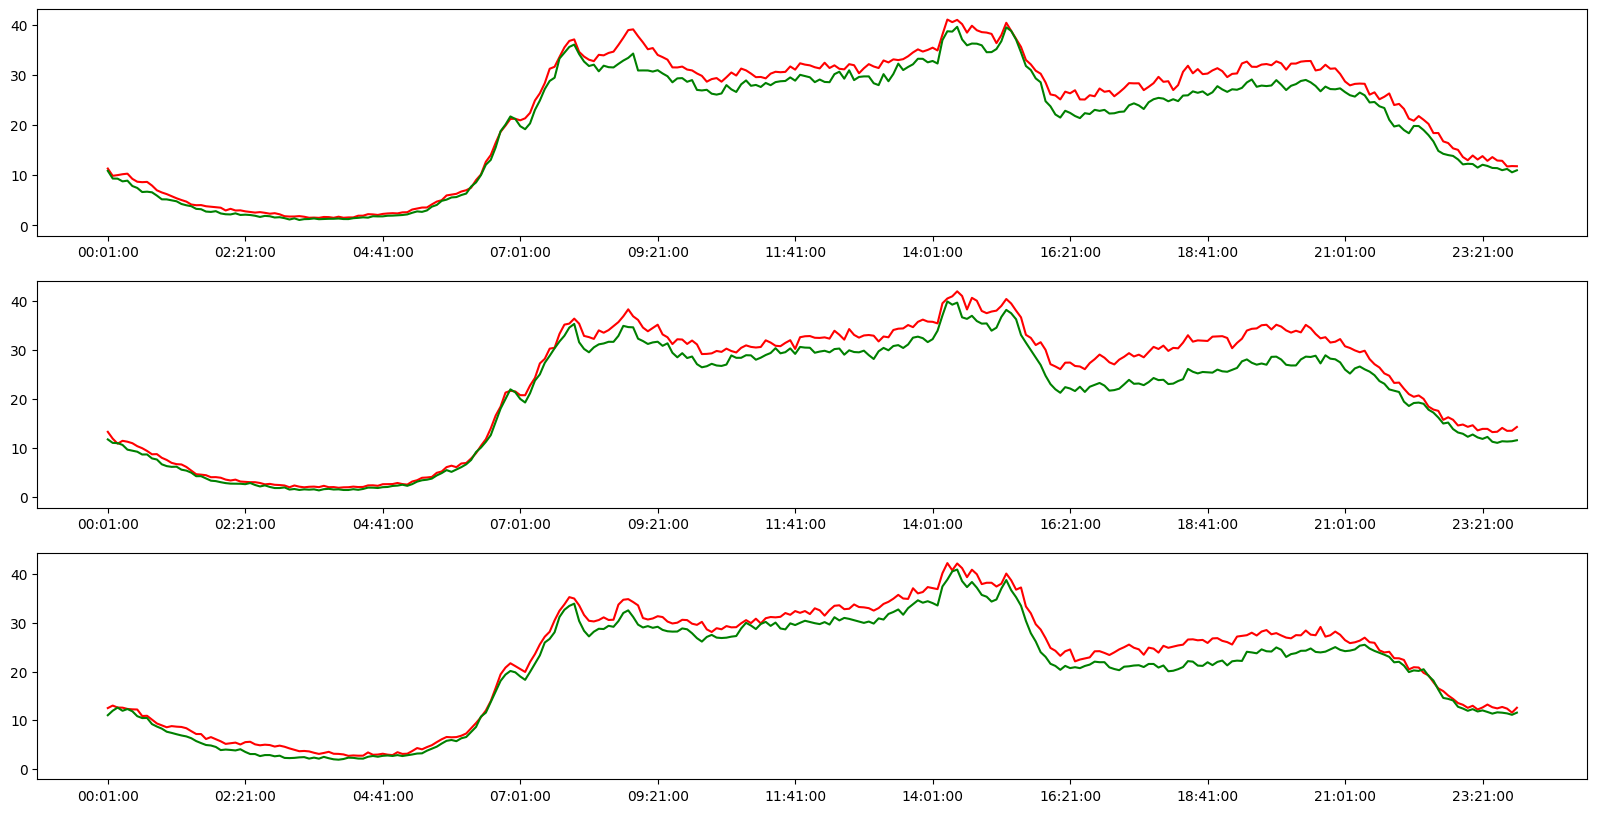

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

vacation_dates=[datetime.datetime(2022,6,29,0,0),datetime.datetime(2022,6,30,0,0),datetime.datetime(2022, 7, 1, 0, 0),
                datetime.datetime(2022, 7, 6, 0, 0),datetime.datetime(2022, 7, 7, 0, 0),datetime.datetime(2022, 7, 8, 0, 0)]
fig,axs=plt.subplots(3,1,figsize=(20,10))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>2:
    color='g'
    print("si")
  else:
    color='r'
    print("no")
  oldi=i
  i=i%3
  axs[i-3].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-3].set_xticks(xticks)
  #axs[i-3].set_title(fileSelected)

  axs[i-3].plot(df, color=color)
  i=oldi+1

#Nochebuena 2021

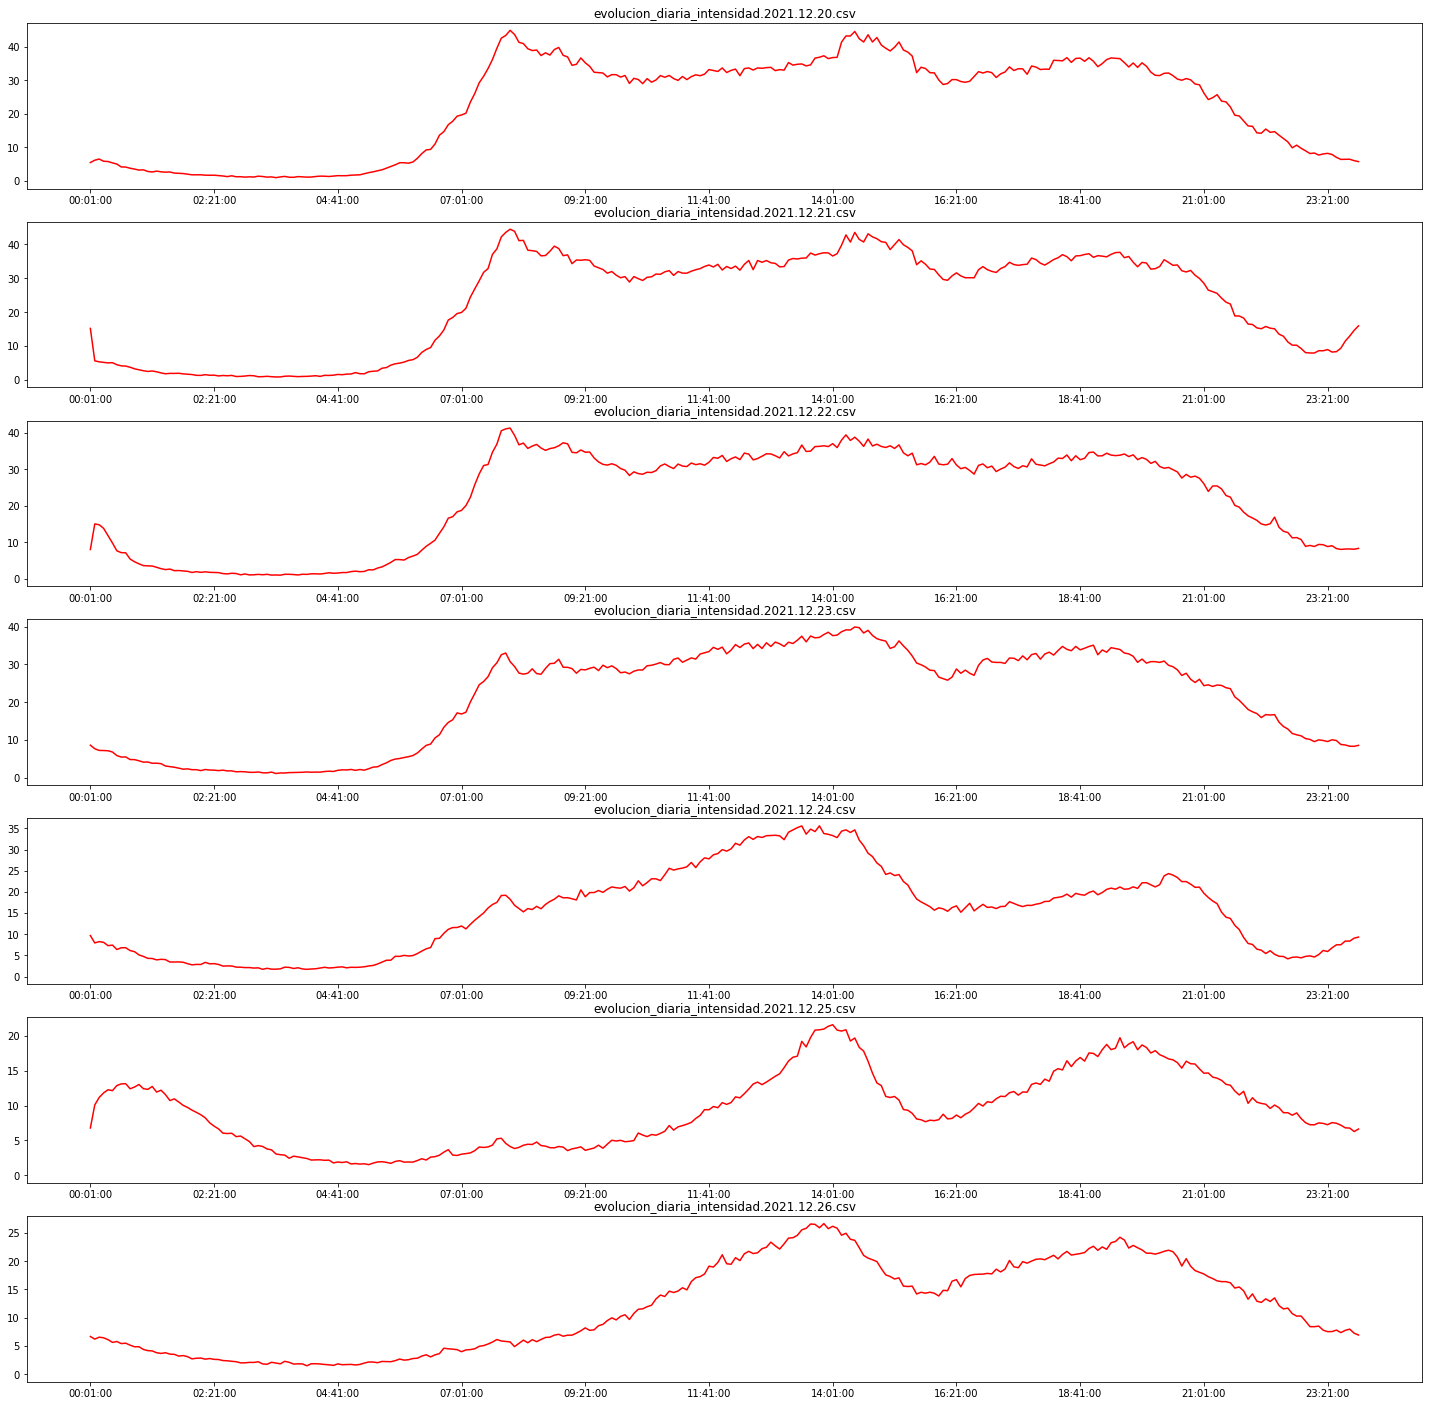

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(20,27):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2021.12.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2021.12.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-20].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-20].set_xticks(xticks)
  axs[i-20].set_title(fileSelected)
  axs[i-20].plot(df, color='r')

# Vuelta de vacaciones

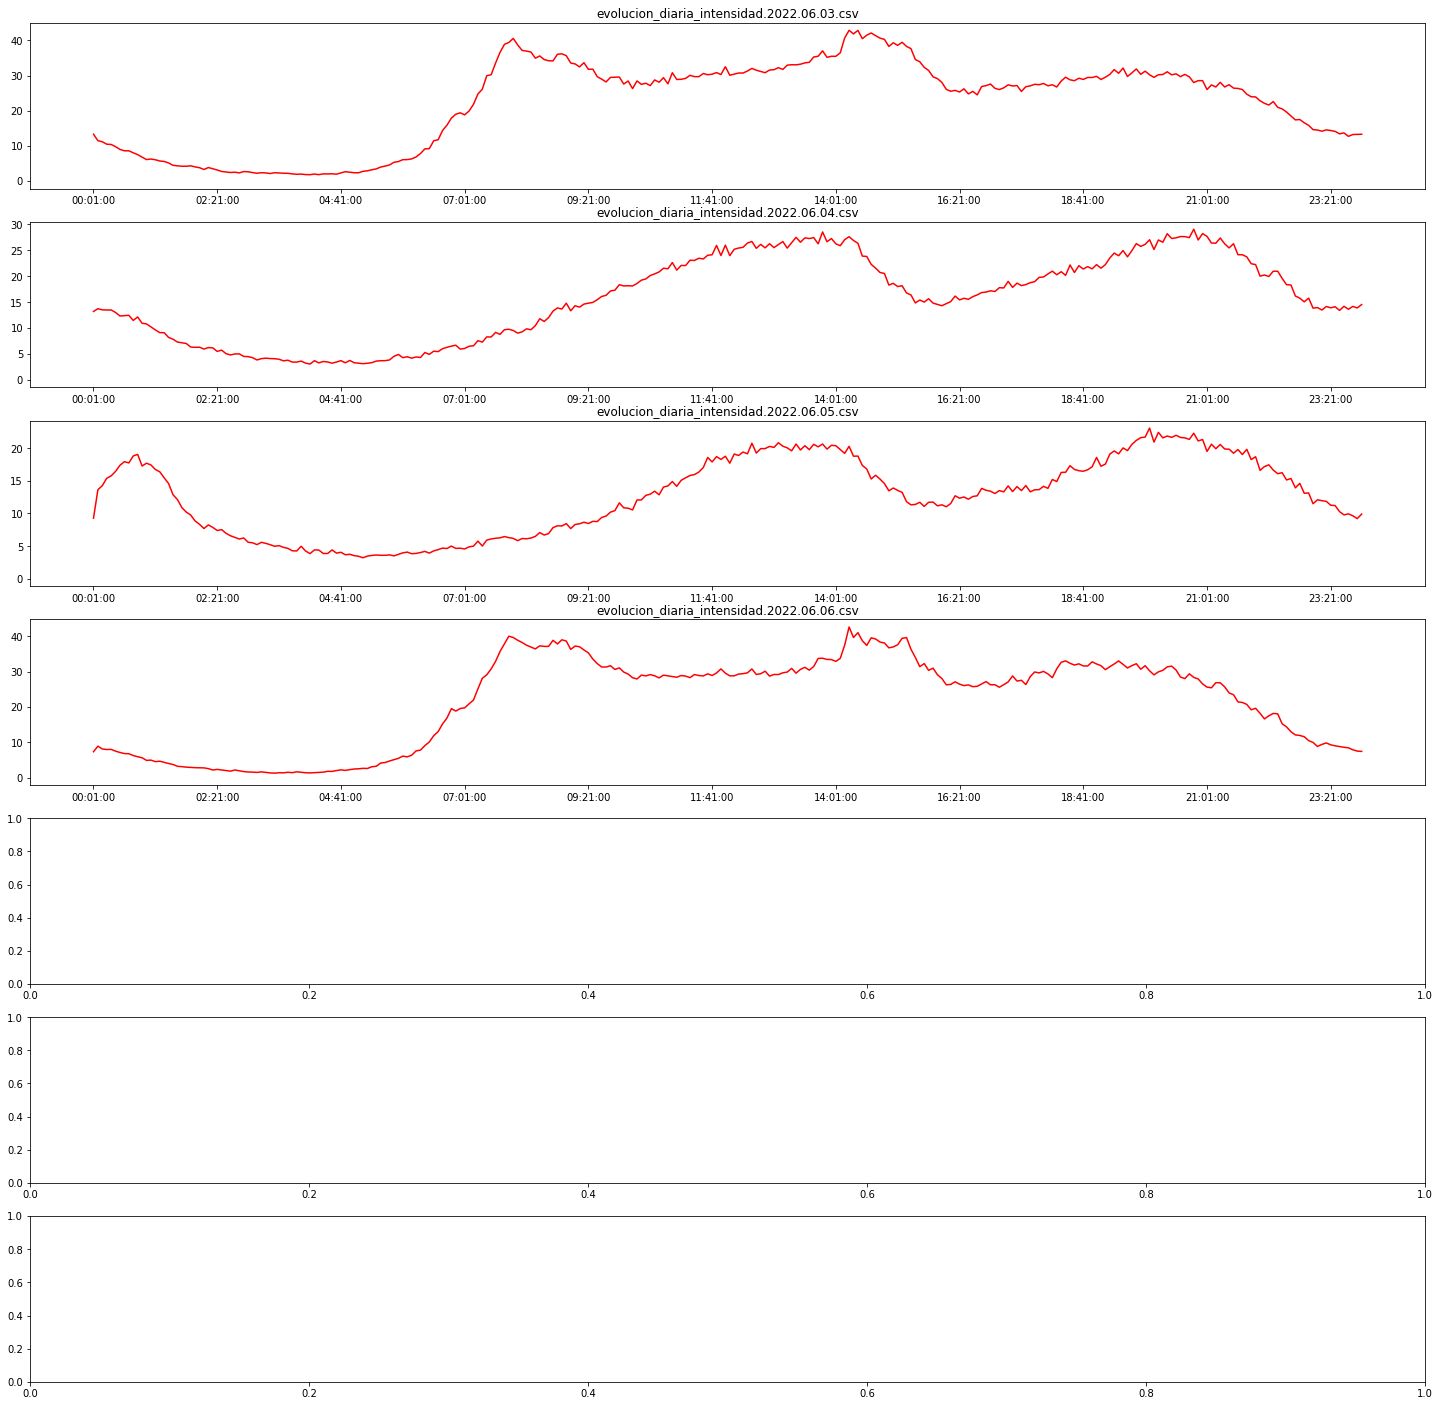

In [ ]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(3,7):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2022.06.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2022.06.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-3].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-3].set_xticks(xticks)
  axs[i-3].set_title(fileSelected)
  axs[i-3].plot(df, color='r')

#Partido Sevilla

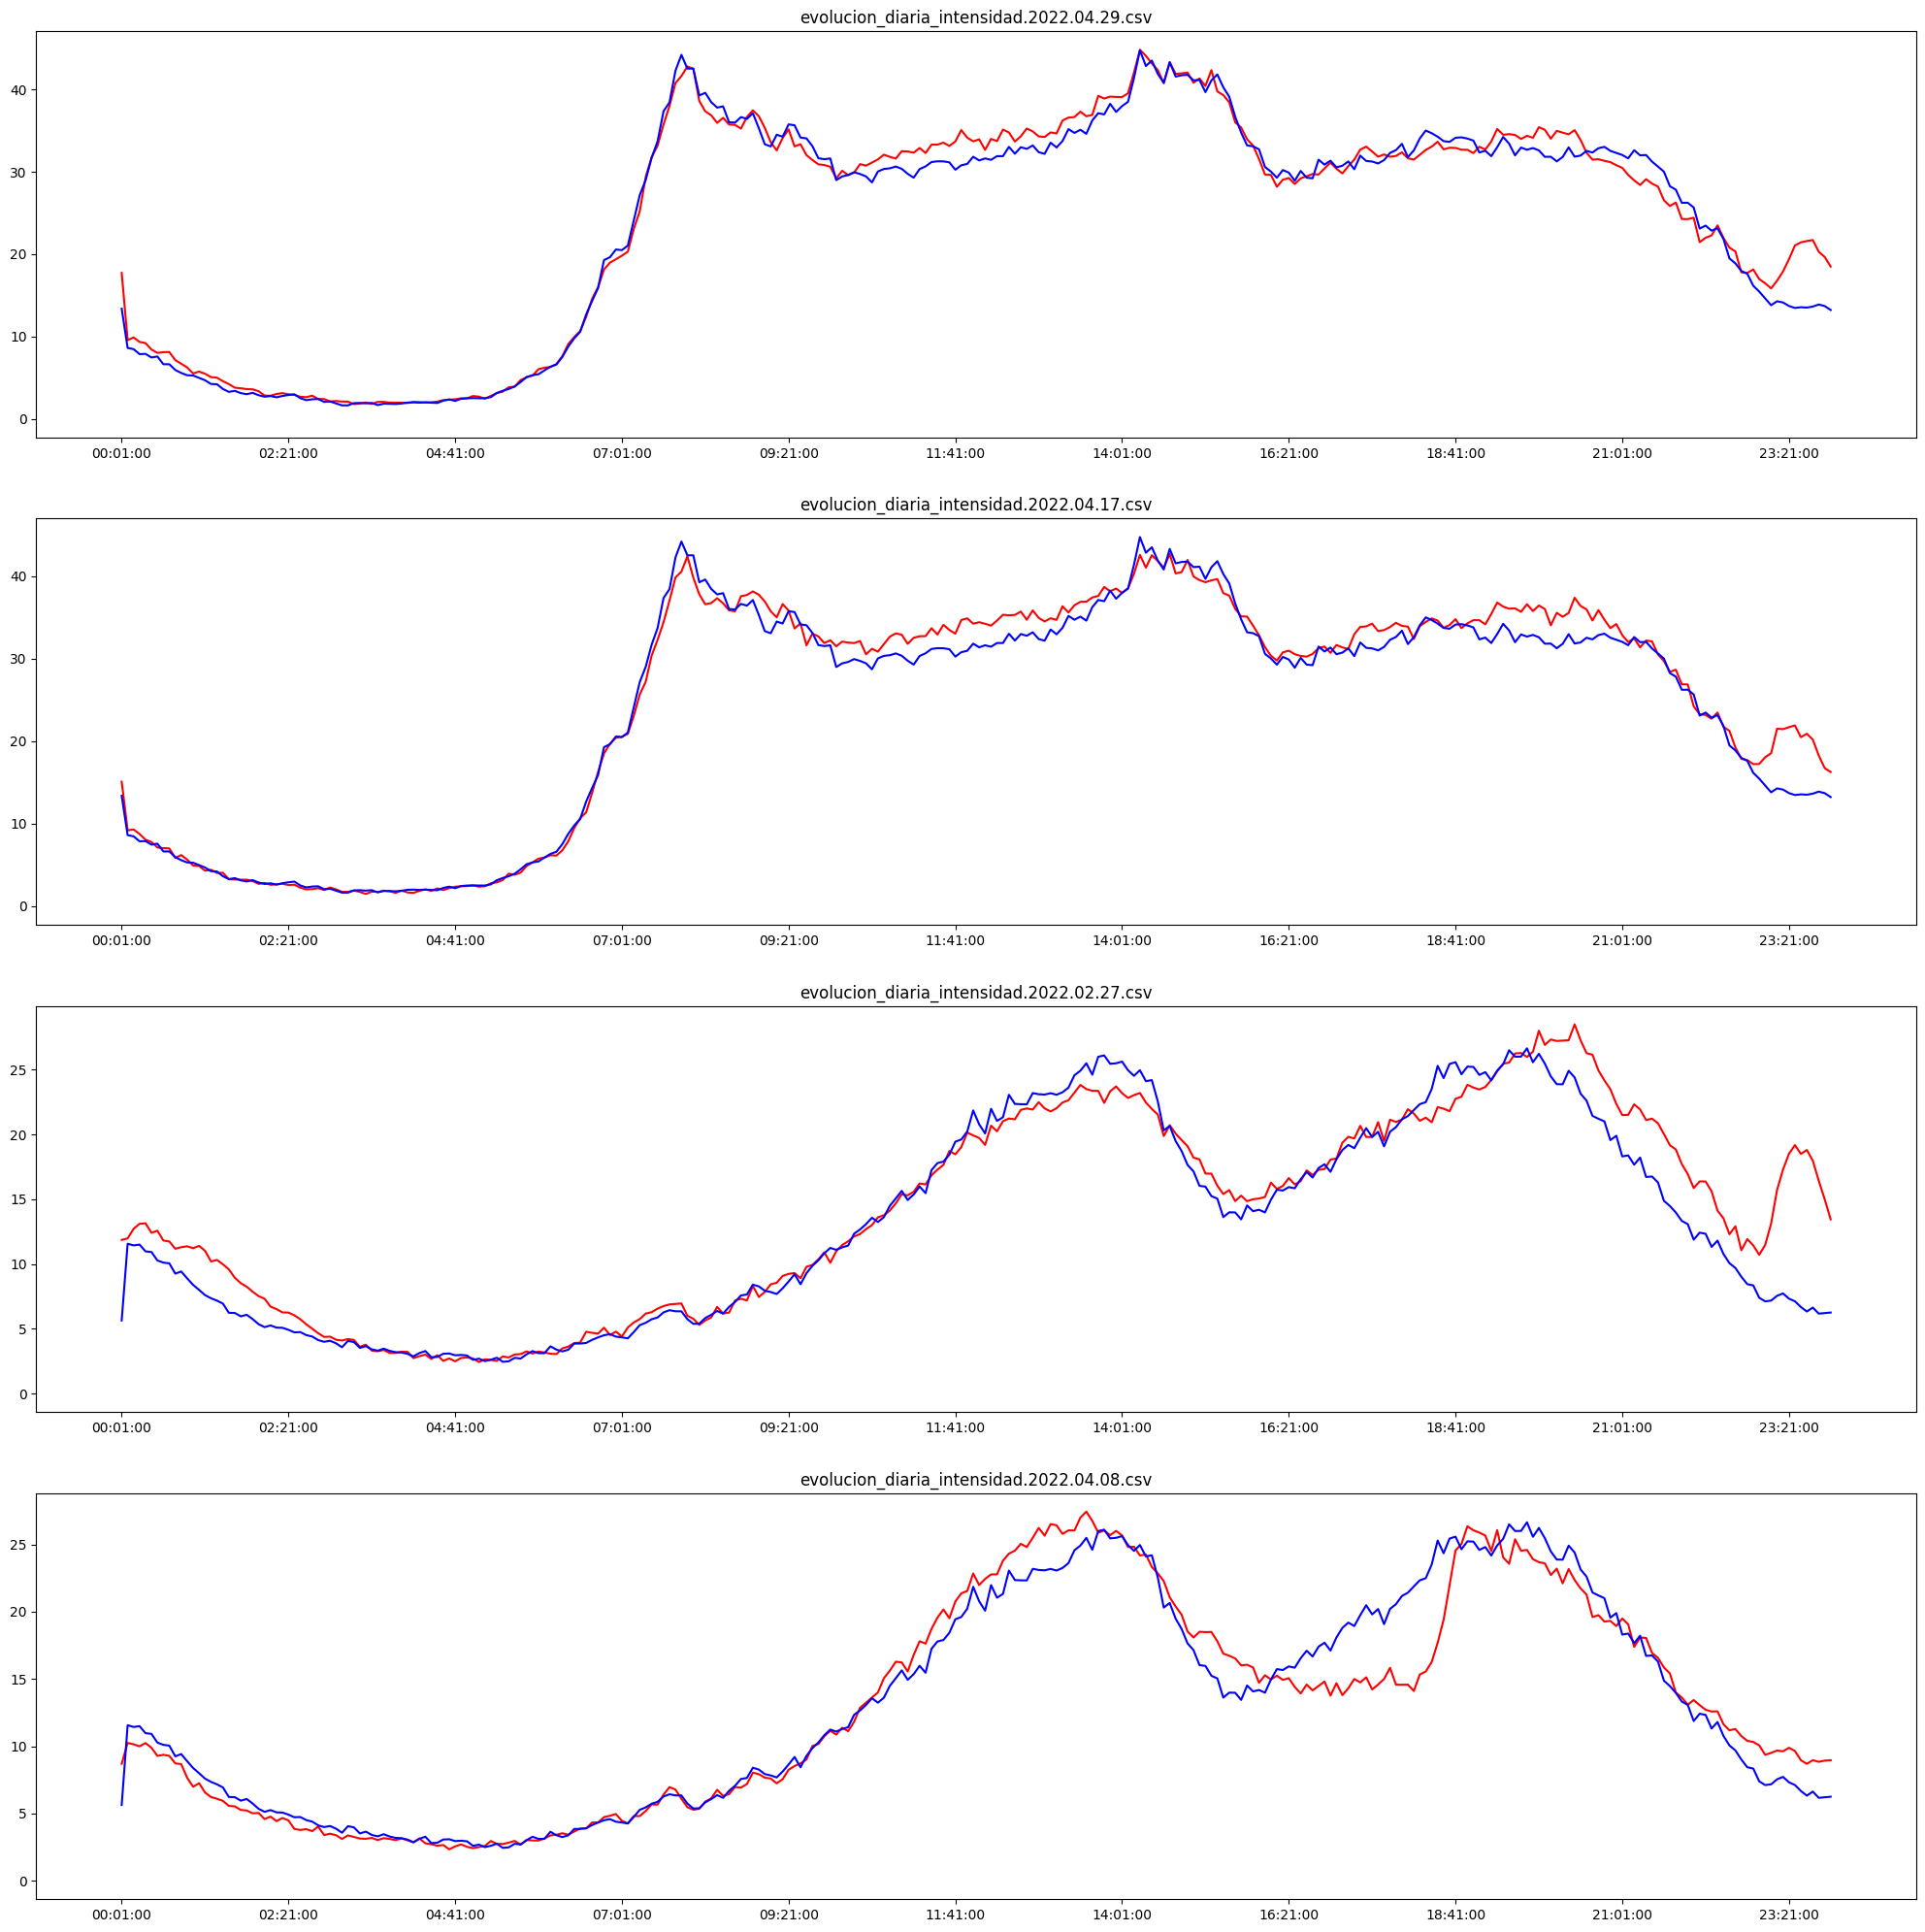

In [21]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

match_day=[datetime.datetime(2022,4,8,0,0),datetime.datetime(2022,4,29,0,0),datetime.datetime(2022,4,17,0,0),datetime.datetime(2022,2,27,0,0),
                datetime.datetime(2022, 4, 1, 0, 0), datetime.datetime(2022, 4, 1, 0, 0), datetime.datetime(2022, 2, 13, 0, 0), datetime.datetime(2022, 2, 13, 0, 0)]
fig,axs=plt.subplots(4,1,figsize=(25,25))
i=0
for v in match_day:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>3:
    color='b'
  else:
    color='r'
    axs[i-1].set_title(fileSelected)

  oldi=i
  i=i%4
  axs[i-4].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-4].set_xticks(xticks)

  axs[i-4].plot(df, color=color)
  i=oldi+1

# Partido Betis

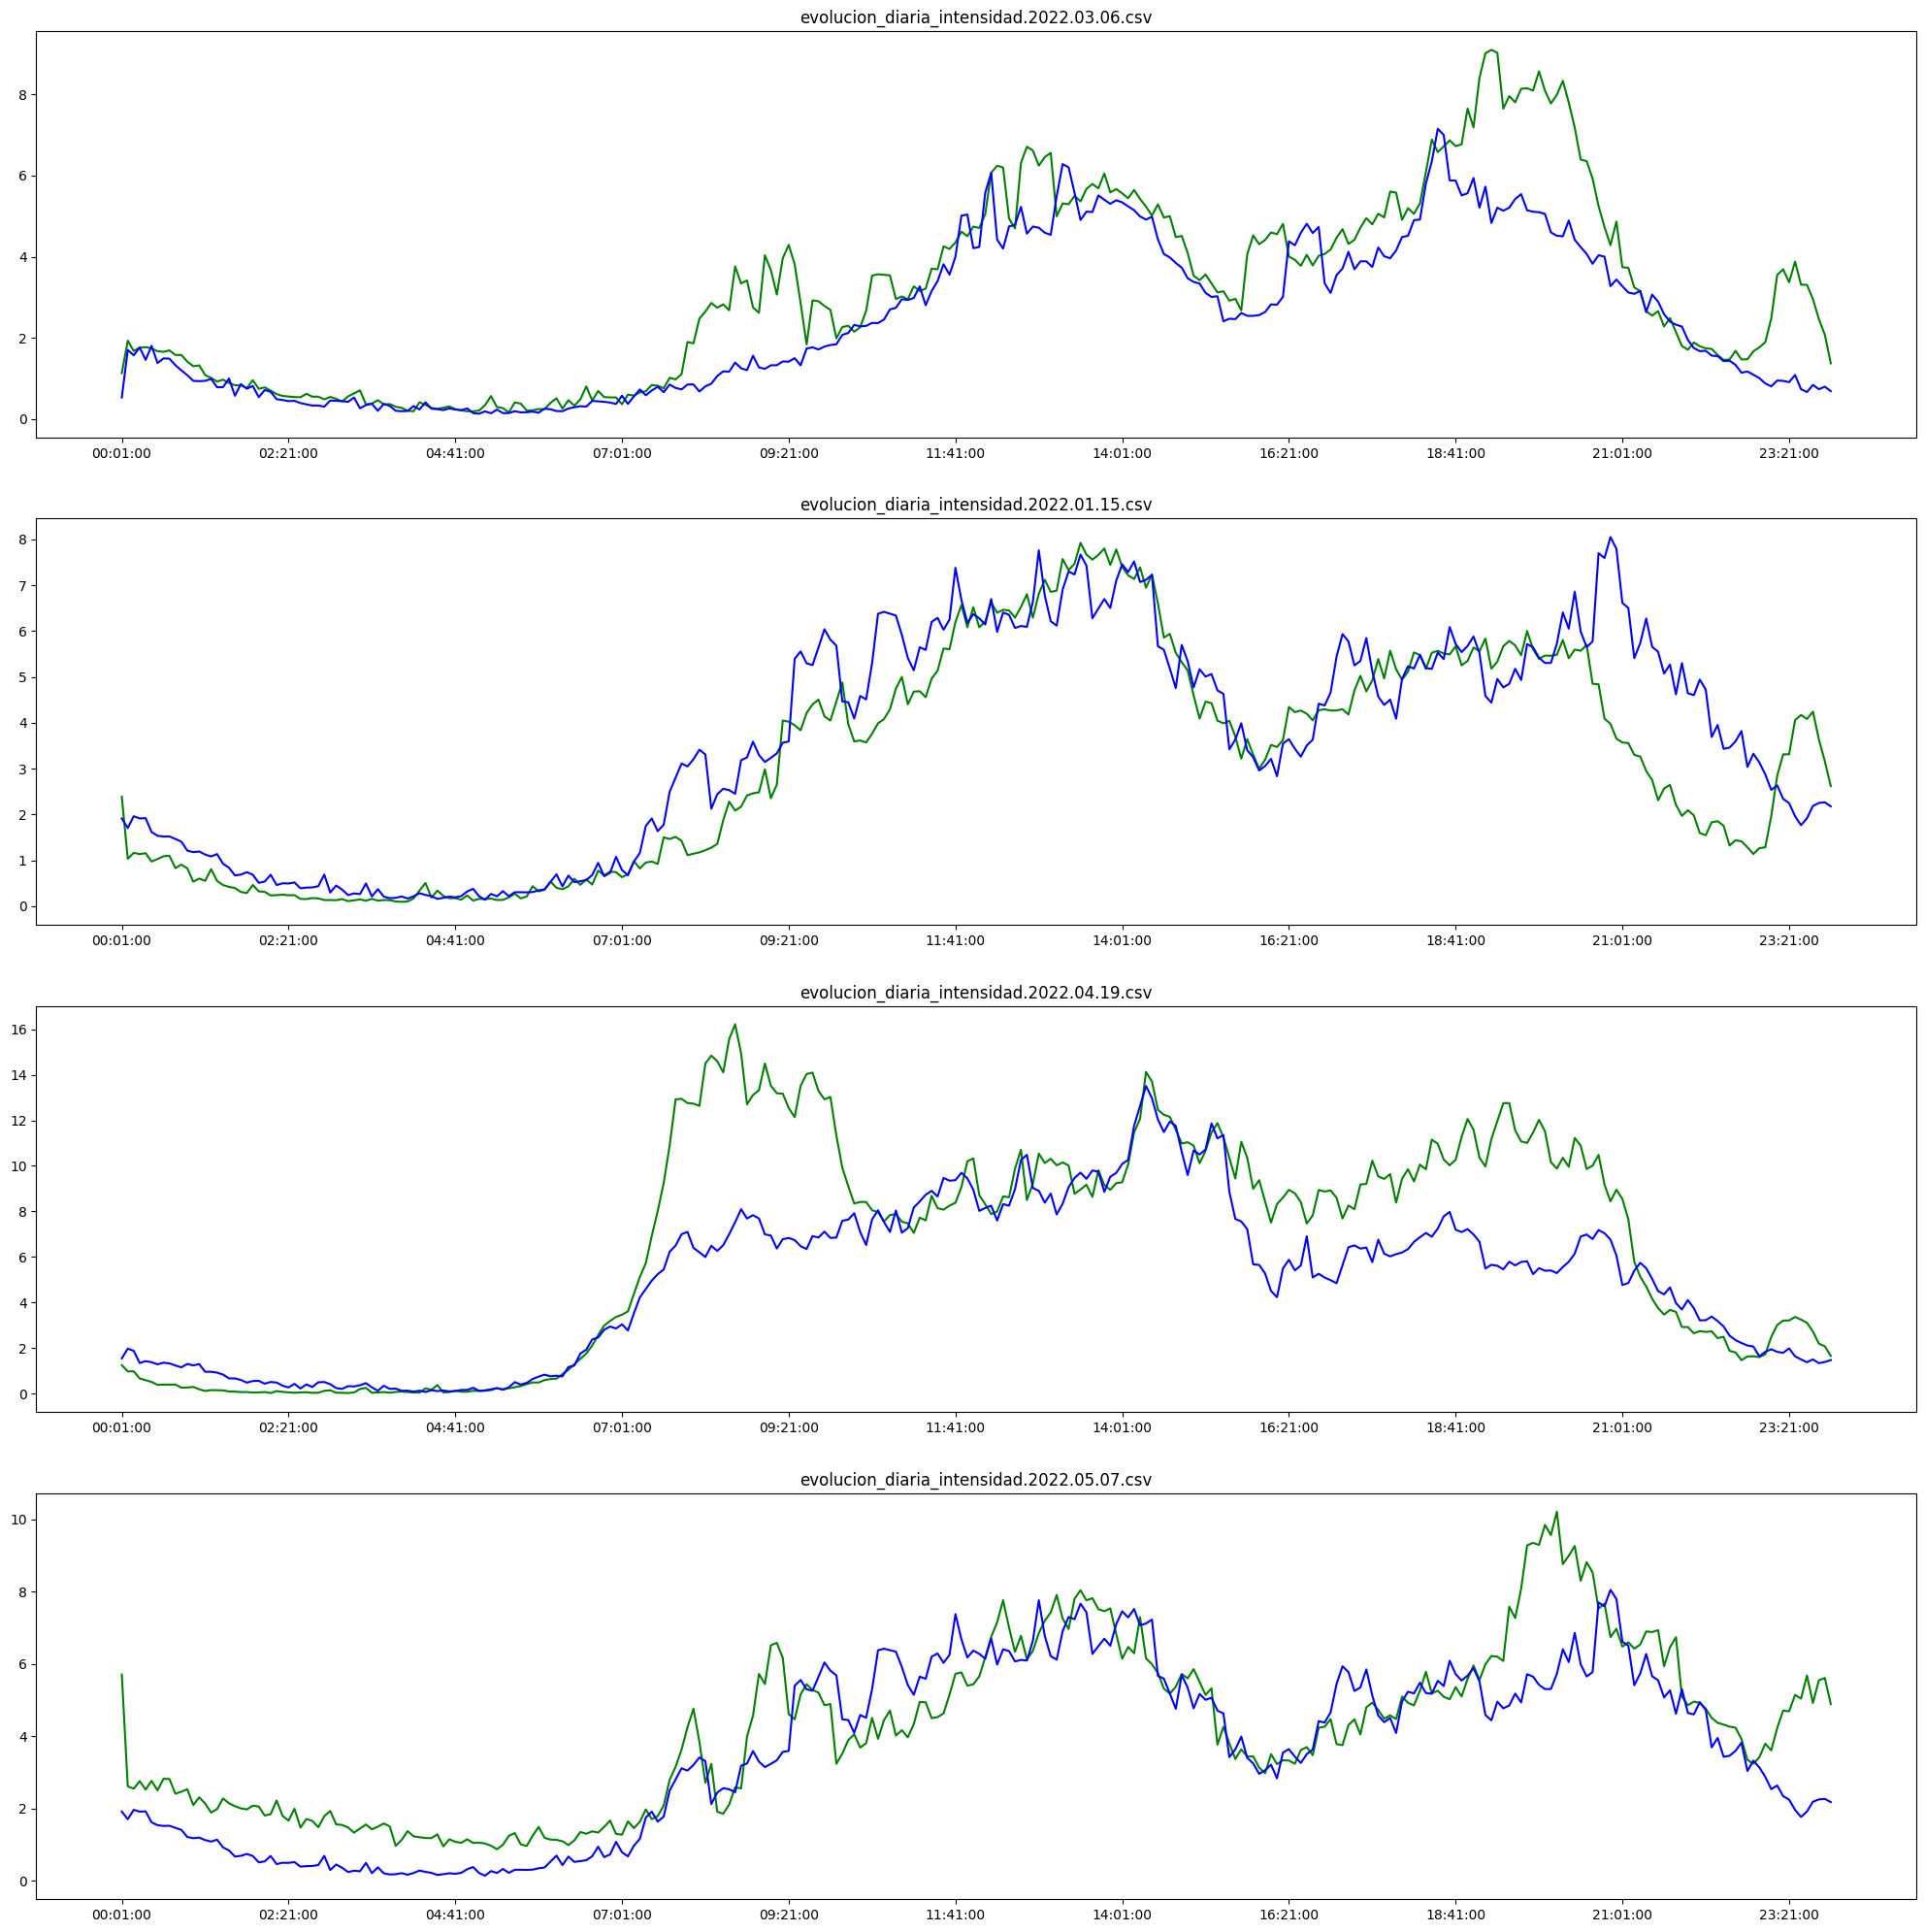

In [30]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

match_day=[datetime.datetime(2022,3,6,0,0),datetime.datetime(2022,1,15,0,0),datetime.datetime(2022,4,19,0,0),datetime.datetime(2022,5,7,0,0),
                datetime.datetime(2022, 2, 13, 0, 0),datetime.datetime(2022, 5, 14, 0, 0),datetime.datetime(2022, 4, 12, 0, 0),datetime.datetime(2022, 5, 14, 0, 0)]
fig,axs=plt.subplots(4,1,figsize=(25,25))
i=0
for v in match_day:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["ocupacion"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>3:
    color='b'
    

  else:
    color='g'
    axs[i].set_title(fileSelected)
    


  oldi=i
  i=i%4
  axs[i].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i].set_xticks(xticks)

  axs[i].plot(df, color=color)
  i=oldi+1